# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили: студент гр. 1384 Бобков Владислав, студентка гр. 1384 Усачева Дарья. Бригада № 7.

## Цель работы
Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Дискретный сигнал:
$$x_0, x_1, x_2, \ldots, x_{N-1},$$
как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $s(t)$.

Будем считать, что отсчеты $ x_k, k = 0, 1, \ldots, N-1 $ дискретного сигнала получены в результате равномерной дискретизации сигнала $s(t)$с шагом дискретизации, равным единице:
$$x_k = s(t_k), k = 0, 1, \ldots, N-1; t_k - t_{k-1} = T, k = 1, 2, \ldots, N-1; T = 1 $$

Если на самом деле $ t_k - t_{k-1} = \Delta t, k = 1, 2, \ldots, N-1 $; и $\Delta t \neq 1 $, то вводим в рассмотрение $ \tilde{t}_k = \dfrac{t_k - t_0}{\Delta t}, k = 0, 1, \ldots, N-1 $.

В результате получим: $ \tilde{t}_k = k; s(\tilde{t}_k) = s(k \Delta t), k = 0, 1, \ldots, N-1$


- Дискретный сигнал в виде функции от времени: 

$$ s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t-k) $$

- Тогда спектр дискретного сигнала можно представить в виде периодической функции с 
периодом, равным $2\pi$:

$$ S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i \omega k} $$

- С другой стороны дискретный сигнал:

$$ s_d(t) = \frac{1}{T} \sum_{k=-\infty}^{\infty} s(t) e^{i\omega_k t} $$

- Тогда спектр дискретного сигнала можно представить в виде (расстояние между копиями равно $\frac{2\pi}{T}$): 

$$ S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S\left(\omega - \frac{2\pi k}{T}\right) $$ 

- Дискретное преобразование Фурье (ДПФ):

$$ X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2\pi n k}{N}}, \quad n = 0, 1, 2, \ldots, N-1 $$

- Круговая и циклическая частоты:

$$ \omega = 2 \pi f $$

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t + \phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1 \pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.

2. Визуализировать исходные аналоговый и дискретизированный сигналы.

3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

8. Повторить п. 4–7 для следующих фильтров:

    a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

    b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

In [89]:
import numpy as np
import matplotlib.pyplot as plt


### Задание 1

Ниже представлена программа, которая формирует дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t + \phi_k)$.

In [90]:
N = 31 # длина последовательности
num_harmonics = 11 # количество гармоник
np.random.seed(0)
T = 1

A = np.random.randint(1, 12, num_harmonics) # амплитуды гармоник
A = A / np.sum(A) # нормировка амплитуд

omega = np.linspace(0, np.pi, num_harmonics) # частоты гармоник
phi = np.random.uniform(0, 0.5, num_harmonics) # фазы гармоник

time_array = np.linspace(0, N, N + 1) # временной интервал
analog_time_array = np.linspace(0, N, 10000)


model_signal = lambda time: sum(A * np.cos(omega * time + phi))

### Задание 2

Ниже представлена программа, которая визуализирует исходный аналоговый и дискретный сигналы.

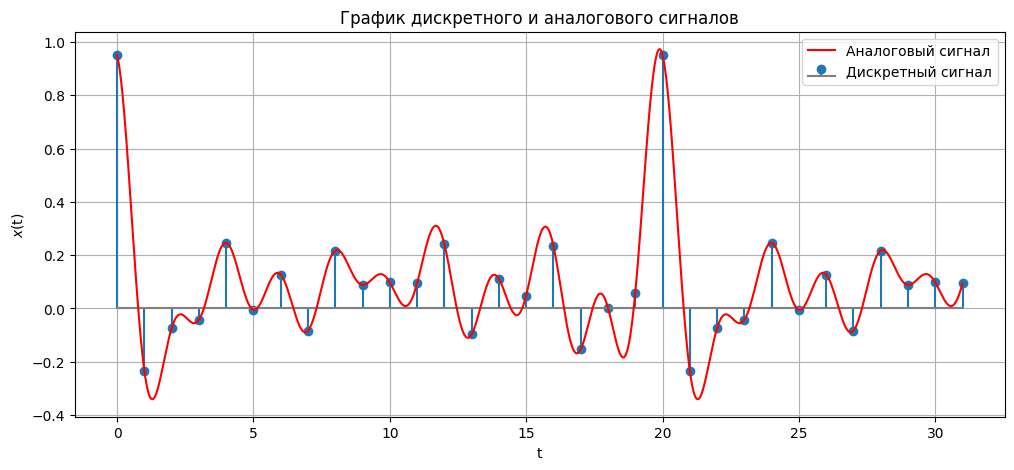

In [91]:
discreate_signal = [model_signal(time) for time in time_array]
analog_signal = [model_signal(time) for time in analog_time_array]

def plot_for_discreate_and_analog_signal():
    plt.figure(figsize=(12, 5))
    plt.ylabel("$x$(t)")
    plt.xlabel('t')
    plt.stem(time_array, discreate_signal, basefmt  = "grey", label="Дискретный сигнал")
    plt.plot(analog_time_array, analog_signal, color = "red", label="Аналоговый сигнал")
    plt.title("График дискретного и аналогового сигналов")
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_for_discreate_and_analog_signal()

### Задание 3

Ниже представлена программа, которая находит дискретные отсчеты спектра дискретного сигнала с помощью дискретного преобразования Фурье.

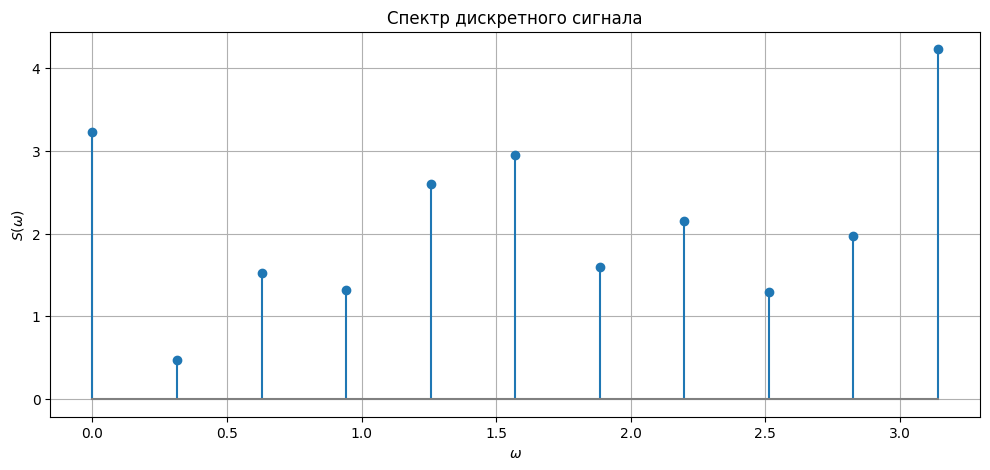

In [92]:
compute_dft = lambda w, signal: sum(signal * np.exp(-1j * w * time_array))
dft = [compute_dft(w, discreate_signal) for w in omega]

def plot_for_spectrum(spectrum, x):
    plt.figure(figsize=(12, 5))
    plt.stem(x, np.abs(spectrum), basefmt="gray")
    plt.grid(True)
    plt.title("Спектр дискретного сигнала")
    plt.xlabel("$\\omega$")
    plt.ylabel("$S(\\omega)$")
    plt.show()
plot_for_spectrum(dft, omega)

Из полученного графика спектра дискретного сигнала можно сделать вывод, что присутствуют доминирующие колебания в среднем диапазоне частот, также пик на графика соответствует самой большой круговой частоте $\omega$.

### Задание 4

Ниже представлена программа, которая реализует линейное сглаживание по 5 и 9 точкам, реализацию передаточной функции можно взять из одной из предыдущих работ.

Общая формула передаточной функции нерекурсивного фильтра, соответсвующего сглаживанию прямой линией:

$$H(\omega) = \frac{1}{2m+1} (1 + 2\cos(\omega) + 2\cos(2\omega) + ... + 2\cos((m-1)\omega) + 2\cos(m\omega))$$

Формула для $H(\omega)$ при сглаживании прямой линией по 5 точкам$(m = 2)$:

$$ H(\omega) = \frac{1}{5}(1 + 2\cos(\omega) + 2\cos(2\omega))$$

Формула для $H(\omega)$ при сглаживании прямой линией по 9 точкам$(m = 4)$:

$$ H(\omega) = \frac{1}{9}(1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega))$$

In [93]:
def model_transfer_function_for_straight_line_smoothing(omega, m):
    result = np.zeros_like(omega)
    result += 1
    for i in range(1, m + 1):
        result += 2 * np.cos(i * omega)
    result /= 2 * m + 1
    return result

model_filtered_signal = lambda  time, m,  transfer_function: sum(A * transfer_function(omega, m) * np.cos(omega * time + phi))

linearly_5_filtered_signal = [model_filtered_signal(time, 2, model_transfer_function_for_straight_line_smoothing) for time in time_array]
linearly_9_filtered_signal = [model_filtered_signal(time, 4, model_transfer_function_for_straight_line_smoothing) for time in time_array]




### Задание 5

Ниже представлена программа, которая визуализирует полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

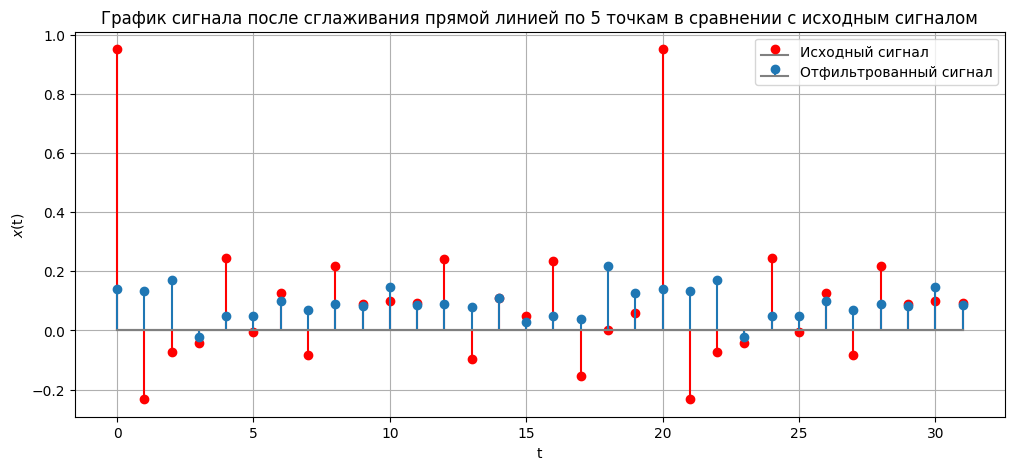

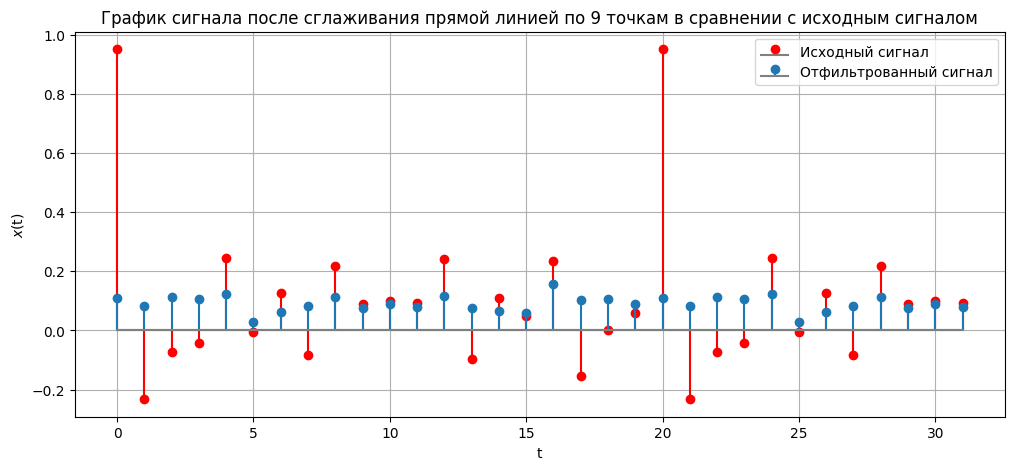

In [94]:
def plot_for_comparison(x, signal, base_signal, title, xlabel, ylabel):
    plt.figure(figsize=(12, 5))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.stem(x, base_signal, basefmt="gray", label="Исходный сигнал",linefmt="red")
    plt.stem(x, signal, basefmt="gray", label="Отфильтрованный сигнал")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_for_comparison(time_array, linearly_5_filtered_signal, discreate_signal, "График сигнала после сглаживания прямой линией по 5 точкам в сравнении с исходным сигналом", "t", "$x$(t)")
plot_for_comparison(time_array, linearly_9_filtered_signal, discreate_signal, "График сигнала после сглаживания прямой линией по 9 точкам в сравнении с исходным сигналом", "t", "$x$(t)")

Из полученных графиков можно предположить, что влияние некоторых (а именно средних и высоких, исходя из действия передаточной функции) частот сильно ослабло, это предположение будет проверено далее.

### Задание 6

Ниже представлена программа, которая с помощью ДПФ находит дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализирует их совместно с отчетами спектра исходного дискретного сигнала.

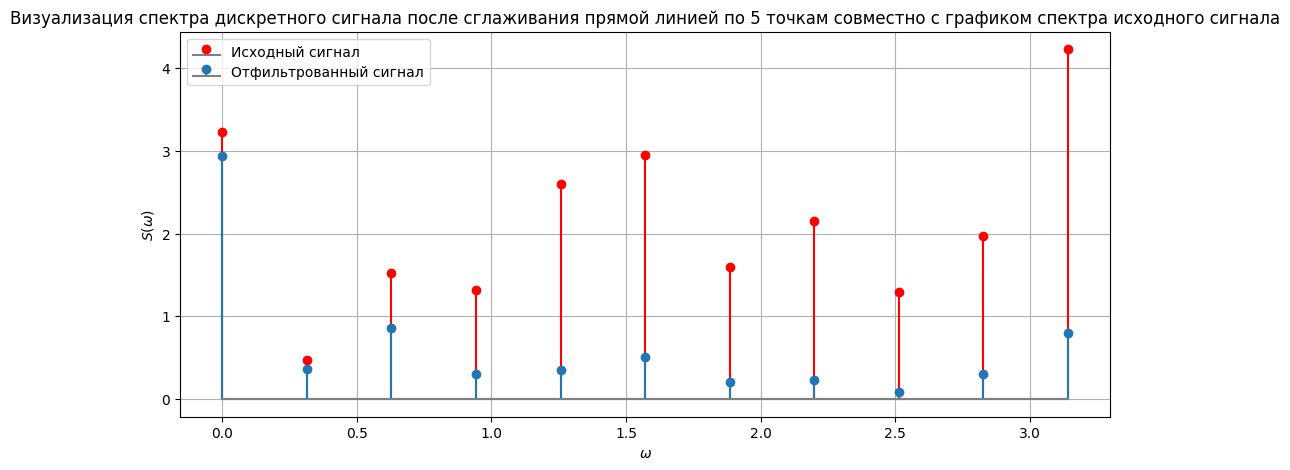

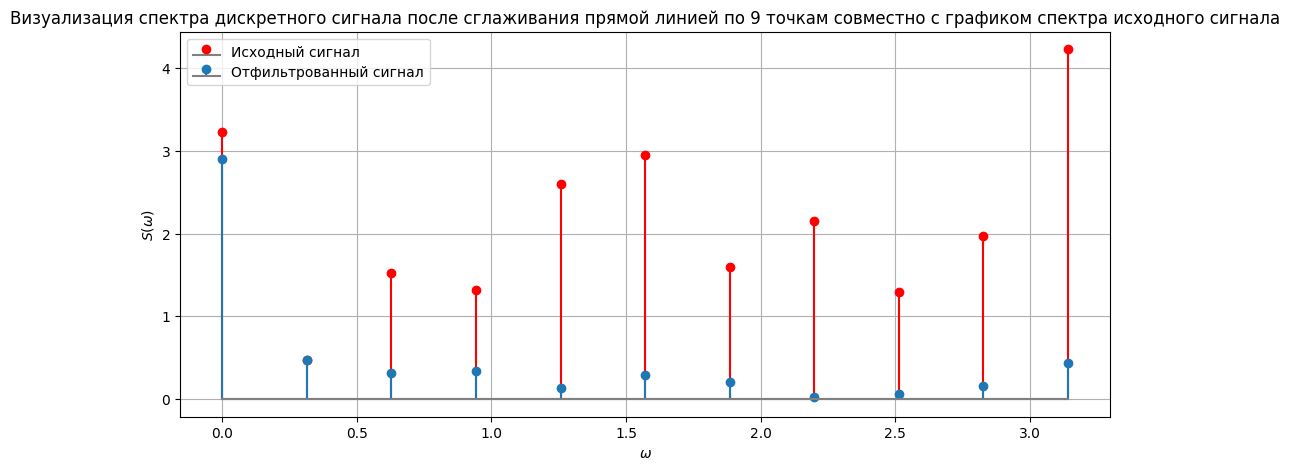

In [95]:
filtered_linearly_5_dft = [compute_dft(w, linearly_5_filtered_signal) for w in omega]
filtered_linearly_9_dft = [compute_dft(w, linearly_9_filtered_signal) for w in omega]

plot_for_comparison(omega, np.abs(filtered_linearly_5_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания прямой линией по 5 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")
plot_for_comparison(omega, np.abs(filtered_linearly_9_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания прямой линией по 9 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")

### Задание 7

Исходя из графиков, можно убедиться в том, что для линейного сглаживания по 5 точкам значение $H(\omega)$ падает быстрее с увеличением $\omega$. Это подтверждается графиками спектров: после фильтрации видно значительное ослабление амплитуд высокочастотных компонентов. Исходные низкие частоты (около 0) проходят практически без изменений, что соответствует $H(0) \approx 1$.
Сглаживание по 9 точкам демонстрирует ещё более выраженное подавление высоких частот. При $\omega > 0.5\pi$ амплитуды практически исчезают. Это соответствует теоретическим значениям $H(\omega)$.

### Задание 8

a. Ниже представлена программа, которая реализует сглаживание полиномом 2 степени по 5 и 9 точкам, реализацию передаточной функции можно взять из одной из предыдущих работ, а также строит графики исходного сигнала в сравнении с отфильтрованным.

Общая формула передаточной функции нерекурсивного фильтра, соответсвующего сглаживанию полиномом 4 степени:

$$H(\omega) = \frac{30 \sum_{k = 1}^{m}\cos(\omega k) k^2 - 3(3m^2 + 3m - 1)(2(\sum_{k = 1}^{m}\cos(\omega k)) + 1)}{-8m^3 - 12m^2 + 2m + 3} $$

Формула для $H(\omega)$ при сглаживании полиномом 2 степени по 5 точкам$(m = 2)$:

$$ H(\omega) = \frac{1}{35}(24\cos(\omega) - 6\cos(2\omega) + 17)$$

Формула для $H(\omega)$ при сглаживании полиномом 2 степени по 9 точкам$(m = 4)$:

$$ H(\omega) = \frac{1}{231}(108\cos(\omega) + 78\cos(2\omega) + 58\cos(3\omega) - 42\cos(4\omega) + 59)$$

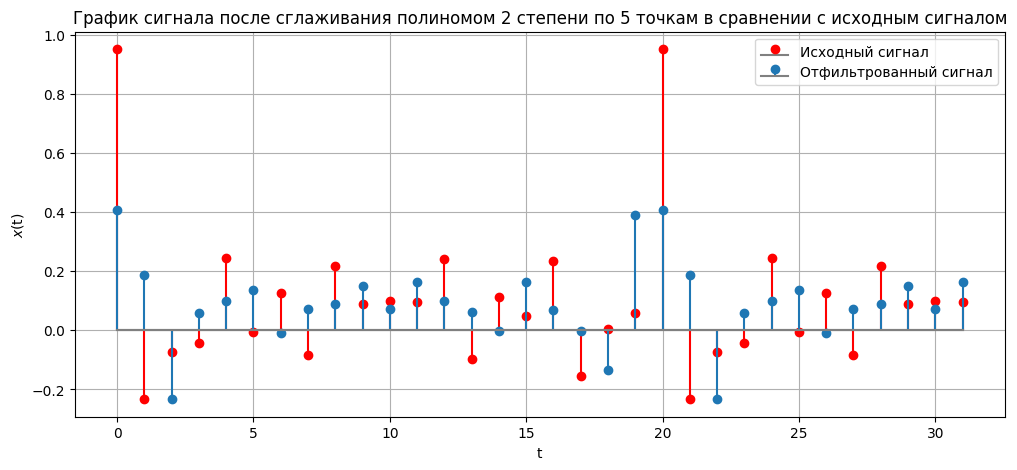

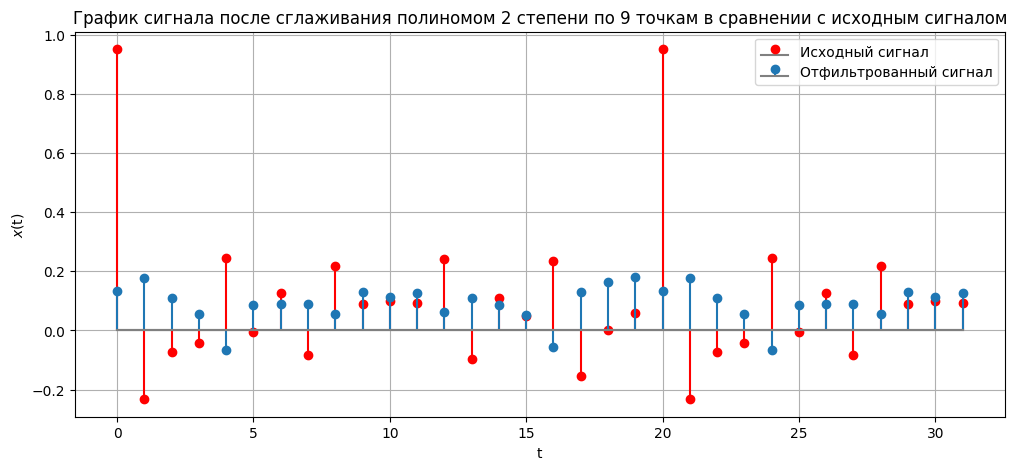

In [96]:
def model_transfer_function_for_polynomial2_smoothing(omega, m):
    result = np.zeros_like(omega)
    sum1 = np.zeros_like(omega)
    for i in range(1, m + 1):
        sum1 += np.cos(i * omega) * (i ** 2)
    sum2 = np.zeros_like(omega)
    for i in range(1, m + 1):
        sum2 += np.cos(i * omega)    
    result = (30 * sum1 - 3 * (3 * m ** 2 + 3 * m - 1) * (2 * sum2 + 1)) / (-8 * m ** 3 - 12 * m ** 2 + 2 * m + 3)
    return result

polinomial2_5_filtered_signal = [model_filtered_signal(time, 2, model_transfer_function_for_polynomial2_smoothing) for time in time_array]
polinomial2_9_filtered_signal = [model_filtered_signal(time, 4, model_transfer_function_for_polynomial2_smoothing) for time in time_array]

plot_for_comparison(time_array, polinomial2_5_filtered_signal, discreate_signal, "График сигнала после сглаживания полиномом 2 степени по 5 точкам в сравнении с исходным сигналом", "t", "$x$(t)")
plot_for_comparison(time_array, polinomial2_9_filtered_signal, discreate_signal, "График сигнала после сглаживания полиномом 2 степени по 9 точкам в сравнении с исходным сигналом", "t", "$x$(t)")

Ниже представлена программа, которая с помощью ДПФ находит дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализирует их совместно с отчетами спектра исходного дискретного сигнала.

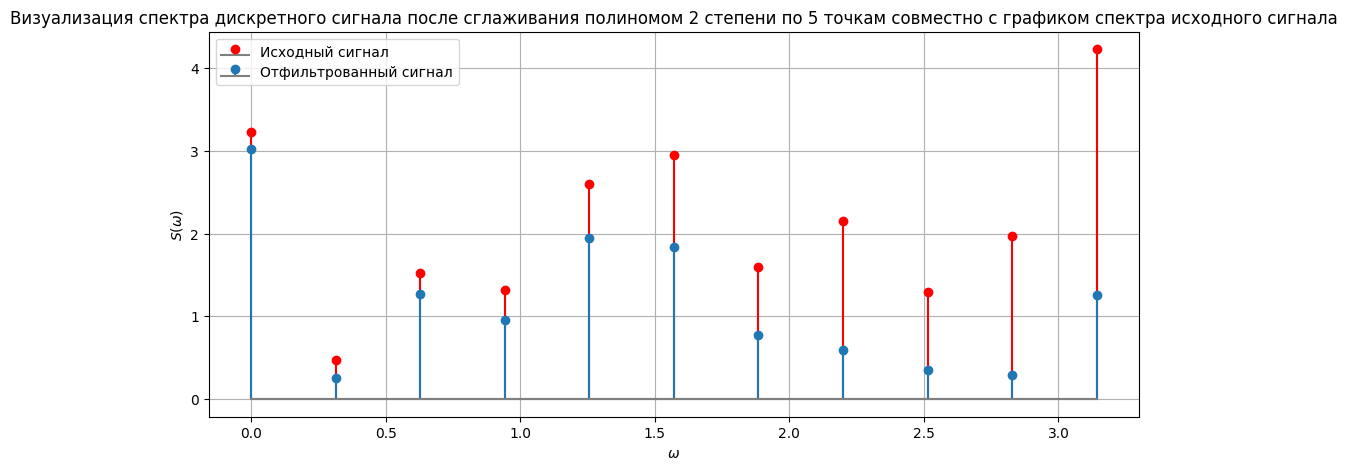

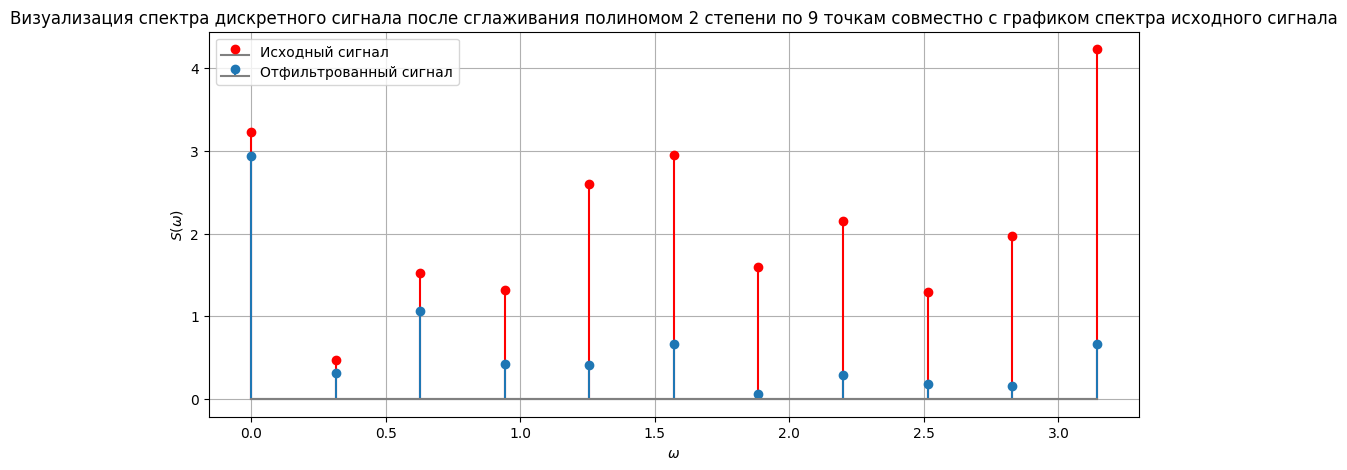

In [97]:
filtered_polinomial2_5_dft = [compute_dft(w, polinomial2_5_filtered_signal) for w in omega]
filtered_polinomial2_9_dft = [compute_dft(w, polinomial2_9_filtered_signal) for w in omega]

plot_for_comparison(omega, np.abs(filtered_polinomial2_5_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания полиномом 2 степени по 5 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")
plot_for_comparison(omega, np.abs(filtered_polinomial2_9_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания полиномом 2 степени по 9 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")

Исходя из графиков, можно убедиться в том, что влияние высоких и средних частот ослаблено, неизменным осталось влияние малых частот большего диапазона, чем при сглаживании прямой линией. Из данных вариантов сглаживания лучше себя показывает сглаживание полиномом 2 степени по 9 точкам, так как в этом случае амплитуда промежуточных колебаний передаточной  функции гораздо меньше, что позволяет эффективнее фильтровать сигнал, если нужно избавиться от влияния высоких и средних частот в сигнале.

б. Ниже представлена программа, которая реализует сглаживание полиномом 4 степени по 5 и 9 точкам, реализацию передаточной функции можно взять из одной из предыдущих работ, а также строит графики исходного сигнала в сравнении с отфильтрованным.

Общая формула передаточной функции нерекурсивного фильтра, соответсвующего сглаживанию полиномом 4 степени:

$H(\omega) = \frac{15}{4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)}((15m^4 + 30m^3 - 35m^2 - 50m + 12)(2(\sum_{k = 0}^{m} \cos(\omega k)) + 1) - 70(2m^2 + 2m - 3)\sum_{k = 0}^{m} k^2 \cos(\omega k) + 126\sum_{k = 0}^{m} k^4 \cos(\omega k))$

Формула для $H(\omega)$ при сглаживании полиномом 4 степени по 7 точкам$(m = 3)$:

$$ H(\omega) = \frac{1}{231}(131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega))$$

Формула для $H(\omega)$ при сглаживании полиномом 4 степени по 11 точкам$(m = 5)$:

$$ H(\omega) = \frac{1}{429}(143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega))$$

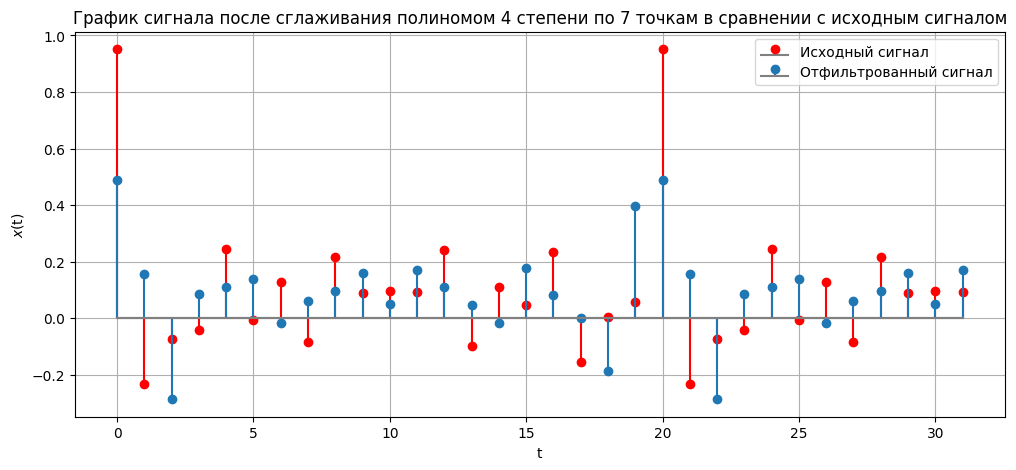

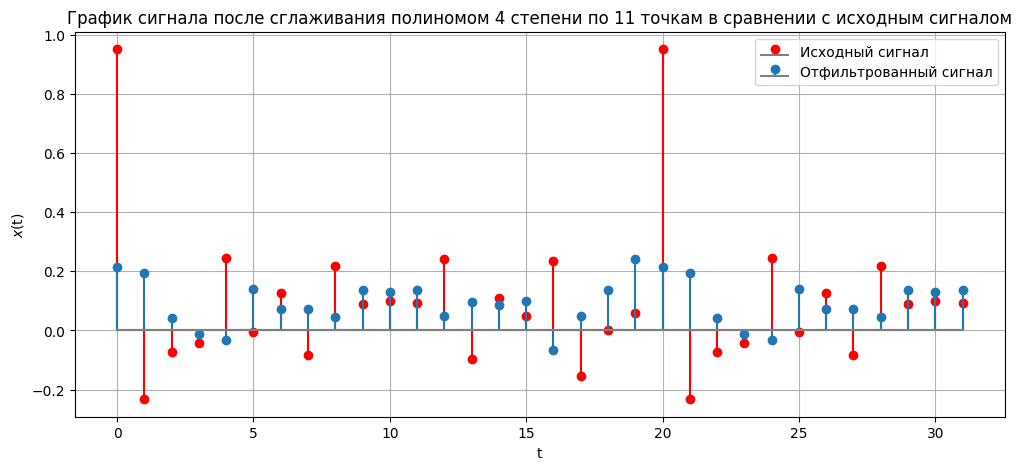

In [98]:
def model_transfer_function_for_polynomial4_smoothing(omega, m):
    result = np.zeros_like(omega)
   
    denominator = 4 * (2 * m - 3) * (2 * m - 1) * (2 * m + 1) * (2 * m + 3) * (2 * m + 5)
    coefficient1 = 15 * m ** 4 + 30 * m ** 3 - 35 * m ** 2 - 50 * m + 12
    coefficient2 = 70 * (2 * m ** 2 + 2 * m - 3)
    coefficient3 = 126
    sum1 = np.zeros_like(omega)
    for i in range(1, m + 1):
        sum1 += np.cos(i * omega) 
    sum2 = np.zeros_like(omega)
    for i in range(1, m + 1):
        sum2 += np.cos(i * omega) * (i ** 2)    
    sum3 = np.zeros_like(omega)
    for i in range(1, m + 1):
        sum3 += np.cos(i * omega) * (i ** 4)
    result = 15 * (coefficient1 * (2 * sum1 + 1) - coefficient2 * sum2 + coefficient3 * sum3) / denominator
    return result

polinomial4_7_filtered_signal = [model_filtered_signal(time, 3, model_transfer_function_for_polynomial4_smoothing) for time in time_array]
polinomial4_11_filtered_signal = [model_filtered_signal(time, 5, model_transfer_function_for_polynomial4_smoothing) for time in time_array]

plot_for_comparison(time_array, polinomial4_7_filtered_signal, discreate_signal, "График сигнала после сглаживания полиномом 4 степени по 7 точкам в сравнении с исходным сигналом", "t", "$x$(t)")
plot_for_comparison(time_array, polinomial4_11_filtered_signal, discreate_signal, "График сигнала после сглаживания полиномом 4 степени по 11 точкам в сравнении с исходным сигналом", "t", "$x$(t)")

Ниже представлена программа, которая с помощью ДПФ находит дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализирует их совместно с отчетами спектра исходного дискретного сигнала.

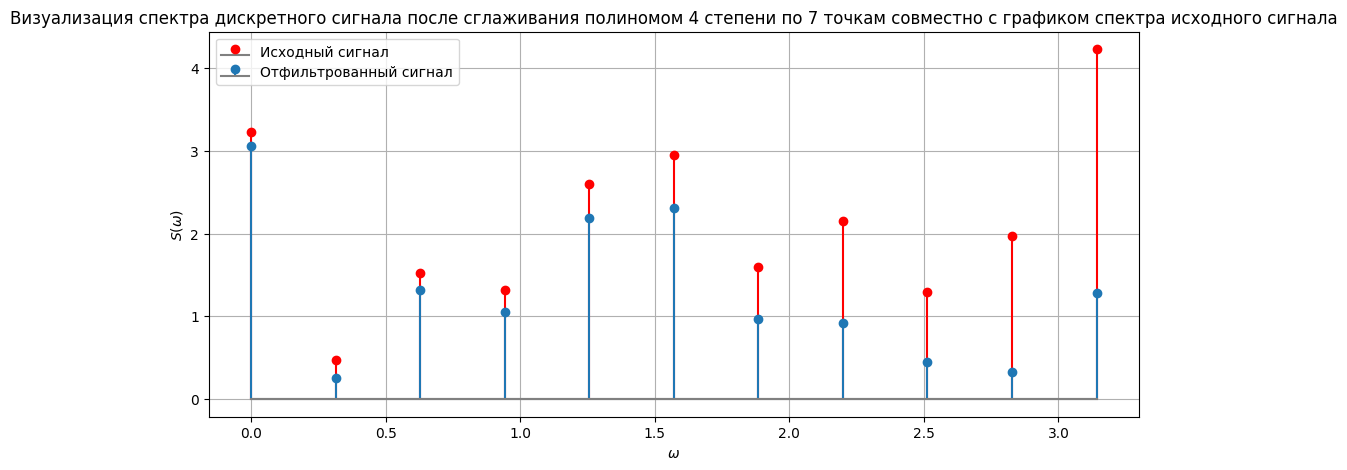

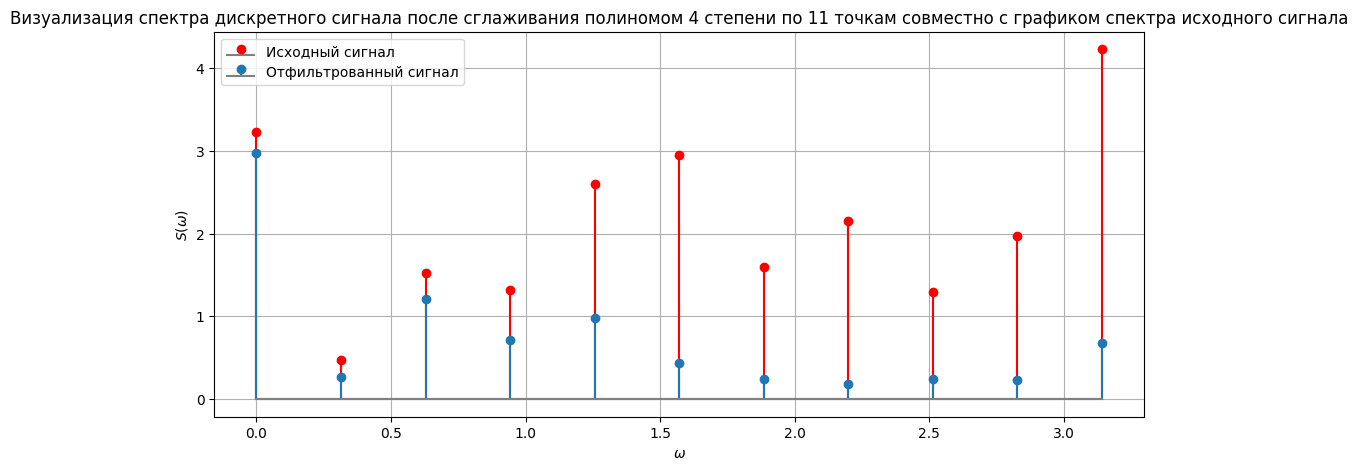

In [99]:
filtered_polinomial4_7_dft = [compute_dft(w, polinomial4_7_filtered_signal) for w in omega]
filtered_polinomial4_11_dft = [compute_dft(w, polinomial4_11_filtered_signal) for w in omega]

plot_for_comparison(omega, np.abs(filtered_polinomial4_7_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания полиномом 4 степени по 7 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")
plot_for_comparison(omega, np.abs(filtered_polinomial4_11_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания полиномом 4 степени по 11 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")

Исходя из графиков, можно убедиться в том, что для полинома 4-й степени сглаживание по 7 точкам ослабляет высокие частоты, но оставляет влияние среднечастотных компонент. Это соответствует более сложной форме $H(\omega)$, где ослабление нарастает с увеличением частоты, но средние частоты всё ещё присутствуют.
Сглаживание по 11 точкам значительно уменьшает среднечастотные компоненты, делая фильтр более эффективным для выделения низкочастотных сигналов.

## Вывод

В ходе лабораторной работы были проанализированы частотные характеристики различных типов нерекурсивных фильтров, использующих методы линейного и полиномиального сглаживания. Рассматривались линейное сглаживание, а также сглаживание полиномами второго и четвертого порядка. Анализ продемонстрировал, как увеличение числа точек и порядка полинома влияет на ширину полосы пропускания, уровень подавления высоко- и среднечастотных составляющих, а также на степень искажений сигнала.

Исследование частотных свойств показало, что линейное сглаживание эффективно удаляет высокочастотные шумы, особенно при увеличении числа точек с 5 до 9. Полиномы второго и четвертого порядка оказались более подходящими для задач, требующих более избирательной фильтрации. Они позволяют точнее настраивать частотный отклик, подавляя как высокочастотные, так и часть среднечастотных составляющих, в зависимости от числа узлов. Наиболее эффективным оказалось сглаживание полиномом четвертого порядка по 11 точкам, которое обеспечивает минимальное влияние на низкочастотные сигналы при максимальном подавлении высоких частот.

Применённые фильтры подтвердили свою эффективность, соответствуя передаточным функциям $H(\omega)$. Линейные фильтры оказались проще в реализации, но менее избирательными, в то время как полиномиальные фильтры продемонстрировали универсальность и гибкость, делая их подходящими для более сложных задач анализа сигналов.